In [1]:
import pandas as pd 
import sklearn 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics 
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
data=pd.read_csv('Train.csv')
data.head()
data['Client Retention Flag']= data['Client Retention Flag'].map({'Yes': 1, 'No': 0})

In [3]:
data_encoded=pd.get_dummies(data)
data_encoded=data_encoded.drop(columns='Client ID')
pd.get_dummies(data_encoded,drop_first=True)
data_encoded=pd.get_dummies(data_encoded,columns=['Flag 2','Flag 5'])
#data_encoded.head()

In [4]:
Y=data_encoded['Client Retention Flag']
X=data_encoded.drop(columns='Client Retention Flag')

In [5]:
Retened=X[Y==1]
Left=X[Y==0]

(array([823., 795., 814., 676., 816., 604., 503., 433., 419., 287.]),
 array([6292019. , 6292435.1, 6292851.2, 6293267.3, 6293683.4, 6294099.5,
        6294515.6, 6294931.7, 6295347.8, 6295763.9, 6296180. ]),
 <a list of 10 Patch objects>)

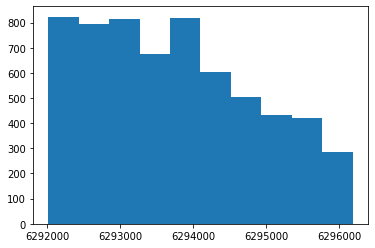

In [6]:
plt.hist(Retened['Company ID'])

(array([287., 339., 273., 238., 299., 256., 266., 225., 200., 213.]),
 array([6292020. , 6292435.5, 6292851. , 6293266.5, 6293682. , 6294097.5,
        6294513. , 6294928.5, 6295344. , 6295759.5, 6296175. ]),
 <a list of 10 Patch objects>)

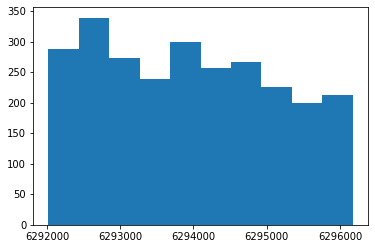

In [7]:
plt.hist(Left['Company ID'])

In [8]:
X.head()

,Company ID,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,Activity 1 Time Period 5,Activity 1 Time Period 4,Activity 1 Time Period 3,...,Flag 5_12,Flag 5_13,Flag 5_14,Flag 5_15,Flag 5_16,Flag 5_17,Flag 5_18,Flag 5_19,Flag 5_20,Flag 5_21
0,6294937,24,16,20,52,0,14,94,44,16,...,0,0,0,0,0,0,0,0,0,0
1,6293796,9,2,0,18,27,0,26,2,6,...,0,0,0,0,0,0,0,0,0,0
2,6293911,1,11,12,0,11,13,5,6,11,...,0,0,0,1,0,0,0,0,0,0
3,6293048,1,0,0,0,2,0,10,1,0,...,0,0,0,1,0,0,0,0,0,0
4,6294364,16,14,48,6,6,0,8,18,12,...,0,0,0,0,0,0,0,0,0,0


KeyboardInterrupt: 

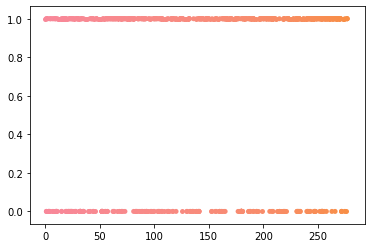

In [9]:
sns.stripplot(x='Company ID',y='Client Retention Flag',data=data_encoded)

(array([6.071e+03, 8.000e+01, 1.300e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  135.2,  270.4,  405.6,  540.8,  676. ,  811.2,  946.4,
        1081.6, 1216.8, 1352. ]),
 <a list of 10 Patch objects>)

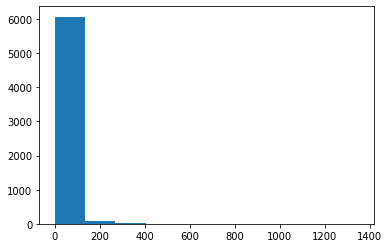

In [10]:
plt.hist(Retened['Activity 1 Time Period 0'])

(array([2.53e+03, 3.80e+01, 2.00e+01, 5.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00]),
 array([  0.,  63., 126., 189., 252., 315., 378., 441., 504., 567., 630.]),
 <a list of 10 Patch objects>)

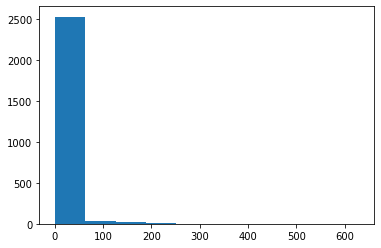

In [11]:
plt.hist(Left['Activity 1 Time Period 0'])

In [12]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state=2)

In [13]:
d_train = xgb.DMatrix(train_X, label=train_Y)
d_test = xgb.DMatrix(test_X, label=test_Y)
params = {
    "eta": 0.06,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": 0.5,
    "eval_metric": "mae",
    "n_jobs":4
}
model2 = xgb.train(params, d_train, 2000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-mae:0.49049
Will train until test-mae hasn't improved in 20 rounds.


F:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	test-mae:0.276447
[200]	test-mae:0.241537
[300]	test-mae:0.221961
[400]	test-mae:0.208668
[500]	test-mae:0.199998
[600]	test-mae:0.192765
[700]	test-mae:0.188684
[800]	test-mae:0.184777
[900]	test-mae:0.181304
[1000]	test-mae:0.178613
[1100]	test-mae:0.176687
[1200]	test-mae:0.174728
[1300]	test-mae:0.17284
[1400]	test-mae:0.171845
[1500]	test-mae:0.170991
[1600]	test-mae:0.170009
Stopping. Best iteration:
[1626]	test-mae:0.169301



In [34]:
xgb_fea_imp=pd.DataFrame(list(model2.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                                 feature  importance
8                            Company ID        3290
2              Activity 1 Time Period 2        1522
3              Activity 1 Time Period 4        1503
1              Activity 1 Time Period 1        1475
4              Activity 1 Time Period 3        1372
0              Activity 1 Time Period 0        1363
27             Activity 1 Time Period 6        1314
18             Activity 1 Time Period 7        1204
14             Activity 1 Time Period 5        1186
6             Activity 1 Time Period 11        1171
26             Activity 1 Time Period 8        1140
28             Activity 1 Time Period 9        1134
22            Activity 1 Time Period 10        1131
11   Client Contract Starting Month_Dec        1100
38             Activity 2 Time Period 1         428
35             Activity 2 Time Period 4         399
9              Activity 2 Time Period 2         370
15             Activity 2 Time Period 3         359
16         

In [53]:
y_pred=model2.predict(d_test)
y_pred
for i in range(y_pred.size):
    y_pred[i]=round(y_pred[i])

In [55]:
metrics.accuracy_score(test_Y,y_pred)

0.8562956204379562

In [79]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
#kfold_5 = KFold(n=len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
#                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [80]:
clf

RandomizedSearchCV(cv='warn', error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024ABE94B908>,
                                        'max_

In [81]:
clf.fit(train_X,train_Y)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.8min finished


RandomizedSearchCV(cv='warn', error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024ABE94B908>,
                                        'max_

In [82]:
clf.cv_results_

{'mean_fit_time': array([  0.19269482, 100.4722085 ,   0.12499221,  43.14457337,
         59.08884327]),
 'std_fit_time': array([2.65555542e-02, 2.42381321e-01, 1.25153985e-06, 2.56085161e-01,
        4.39286355e-01]),
 'mean_score_time': array([0.        , 0.32810132, 0.        , 0.20231024, 0.20198822]),
 'std_score_time': array([0.        , 0.02209546, 0.        , 0.06554768, 0.01544012]),
 'param_colsample_bytree': masked_array(data=[1.0989453779946738, 0.9552586240016807,
                    1.0776959280176635, 0.7742737070720394,
                    0.6500371567030379],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.5207343409530147, 0.12258044546356768,
                    0.3794859760348401, 0.34870860702407974,
                    0.36148963096193454],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_de

In [83]:
clf.cv_results_['mean_test_score']

array([0.        , 0.88081333, 0.        , 0.87190755, 0.88079953])

In [84]:
clf.cv_results_['params']

[{'colsample_bytree': 1.0989453779946738,
  'learning_rate': 0.5207343409530147,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 888,
  'subsample': 0.5824395235906816},
 {'colsample_bytree': 0.9552586240016807,
  'learning_rate': 0.12258044546356768,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 931,
  'subsample': 0.4580621875729486},
 {'colsample_bytree': 1.0776959280176635,
  'learning_rate': 0.3794859760348401,
  'max_depth': 3,
  'min_child_weight': 2,
  'n_estimators': 215,
  'subsample': 0.6263803965574541},
 {'colsample_bytree': 0.7742737070720394,
  'learning_rate': 0.34870860702407974,
  'max_depth': 5,
  'min_child_weight': 4,
  'n_estimators': 499,
  'subsample': 0.5874436380037278},
 {'colsample_bytree': 0.6500371567030379,
  'learning_rate': 0.36148963096193454,
  'max_depth': 6,
  'min_child_weight': 2,
  'n_estimators': 797,
  'subsample': 0.6384668978455414}]